# Gene expression model


#### Names and id's:

Student 1: Shani Shalev, 316315720

Student 2: Yosef Ben Yehuda, 207108770


Much of this session follows [Justin Bois](http://be150.caltech.edu/2017/handouts/gillespie_simulation.html)'s handouts.

For simple protein production, we have the following reactions:

\begin{align}
\text{DNA} \rightarrow \text{mRNA} \rightarrow \text{protein}
\end{align}

<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/3/37/Genetic_code.svg" />
</p>

A more quantitative description is:

- DNA moelcules are constat in a cell
- mRNA molecules are produced with rate $\beta_m$ per second from DNA molecules
- mRNA molecules degrade at a rate $\gamma_m$ per second
- Protein molecules are produced at a rate $\beta_p$ per second from mRNA molecules
- Protein molecules degrade at a rate $\gamma_p$ per second

# Deterministic model
The _deterministic_ equations, which describe the dynamics over a very large number of independent of replicate dynamics (ie cells), is 

$$
\frac{dm}{dt} = \beta_m - \gamma_m m, \\
\frac{dp}{dt} = \beta_p m - \gamma_p p.
$$

Note that these dynamics are linear in $m$ and $p$, and are therefore much simpler than the predator-prey dynamics of the [Lotka-Volterra equations](lotka-volterra.ipynb).

## Assignment

1. Find the steady state of this model using the `SymPy` package (symbolically).

In [31]:
from sympy import symbols, Eq, solve
def calculate_symbolic_steady_state():
    m, p = symbols('m p')
    beta_m, gamma_m, beta_p, gamma_p = symbols('beta_m gamma_m beta_p gamma_p')
    dm_dt = beta_m - gamma_m * m
    dp_dt = beta_p * m - gamma_p * p

    steady_state_eq1 = Eq(dm_dt, 0)
    steady_state_eq2 = Eq(dp_dt, 0)

    steady_state_solution = solve((steady_state_eq1, steady_state_eq2), (m, p))

    print("Steady state solution (m, p):", steady_state_solution)
    

def calculate_steady_state(beta_m_val, gamma_m_val, beta_p_val, gamma_p_val):
    m, p = symbols('m p')

    dm_dt = beta_m_val - gamma_m_val * m
    dp_dt = beta_p_val * m - gamma_p_val * p

    steady_state_eq1 = Eq(dm_dt, 0)
    steady_state_eq2 = Eq(dp_dt, 0)
        
    steady_state_solution = solve((steady_state_eq1, steady_state_eq2), (m, p))
    return steady_state_solution
calculate_symbolic_steady_state()

Steady state solution (m, p): {m: beta_m/gamma_m, p: beta_m*beta_p/(gamma_m*gamma_p)}


I wrote it also in markdown, for better view:

$m=\frac{\beta_m}{\gamma_m}$, $p=\frac{\beta_m\beta_p}{\gamma_m\gamma_p}$



From now on, assume $\beta_m=1.5$, $\gamma_m=0.5$, $\beta_p=2$, $\gamma_p=3$.

2. Test if this value is a steady state indeed.

In [3]:
print('the steady state solution for the given values of beta_m, gamma_m, beta_p, gamma_p happens when the initial m, p are:')
for var, val in calculate_steady_state(1.5, 0.5, 2, 3).items():
    print(f"{var}: {val.evalf():.2f}")

the steady state solution for the given values of beta_m, gamma_m, beta_p, gamma_p happens when the initial m, p are:
m: 3.00
p: 2.00


3. Plot using `matplotlib` the amount of protein and mRNA over 20 seconds, with starting values of $m=0$, and $p=0$.

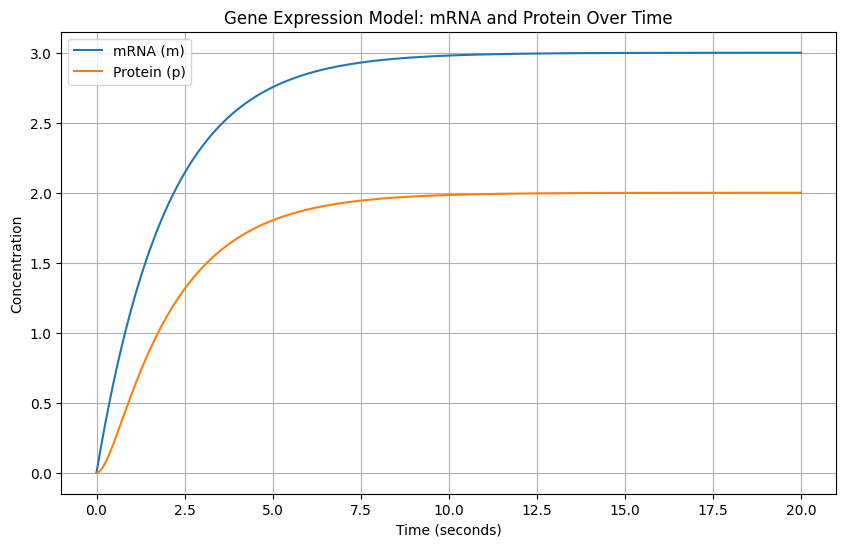

In [32]:
import numpy as np
from sympy import symbols, Eq, solve

import matplotlib.pyplot as plt
from scipy.integrate import odeint

beta_m, gamma_m, beta_p, gamma_p = 1.5, 0.5, 2.0, 3.0
m0, p0 = 0, 0

def build_eq(y, t, beta_m, gamma_m, beta_p, gamma_p):
    m, p = y
    dm_dt = beta_m - gamma_m * m
    dp_dt = beta_p * m - gamma_p * p
    return [dm_dt, dp_dt]

y0 = [m0, p0]

t = np.linspace(0, 20, 1000)

# Solve the differential equations, I used odeint instead of solve_ivp to avoid the warning
solution = odeint(build_eq, y0, t, args=(beta_m, gamma_m, beta_p, gamma_p))
m_solution = solution[:, 0]
p_solution = solution[:, 1]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, m_solution, label='mRNA (m)')
plt.plot(t, p_solution, label='Protein (p)')
plt.xlabel('Time (seconds)')
plt.ylabel('Concentration')
plt.title('Gene Expression Model: mRNA and Protein Over Time')
plt.legend()
plt.grid(True)
plt.show()

4. Print the amount of protein after 1 seconds. with starting values of $m=10$, and $p=100$.

In [30]:
solution = odeint(build_eq, [10 ,100], [0 , 1], args=(beta_m, gamma_m, beta_p, gamma_p))

val , var = solution[1]
print(f"""
      protein is {var:.2f} at time 1 sec,
      mRNA is {val:.2f} at time 1 sec
      """)


      protein is 10.00 at time 1 sec,
      mRNA is 7.25 at time 1 sec
      


### Bonus
5. Create a `quiver` plot with `dm` on the Y-axis, and `dp` on the X-axis. DNA should be between (0,10), Proteins should be between(0,10).

https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.quiver.html#matplotlib.axes.Axes.quiver
https://matplotlib.org/stable/plot_types/arrays/quiver.html#sphx-glr-plot-types-arrays-quiver-py
